In [1]:
import nltk
from nltk.corpus import conll2002
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.tag.sequential import ClassifierBasedPOSTagger
from nltk import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
import time
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('conll2002')

[nltk_data] Downloading package conll2002 to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2002 is already up-to-date!


True

In [3]:
# Φόρτωση εκπαίδευσης και test δεδομένων
train_sents = conll2002.tagged_sents('esp.train')
test_sents = conll2002.tagged_sents('esp.testb')

In [4]:
# Κατασκευή στατιστικού tagger
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff

tagger = backoff_tagger(train_sents, [UnigramTagger, BigramTagger, TrigramTagger])

In [5]:
start_time = time.time()

# Flat λίστες λέξεων και πραγματικών tags
words = [word for sent in test_sents for (word, _) in sent]
gold_tags = [tag for sent in test_sents for (_, tag) in sent]

# Πρόβλεψη
predicted = [tagger.tag([word for word, _ in sent]) for sent in test_sents]
pred_tags = [tag for sent in predicted for (_, tag) in sent]

end_time = time.time()
execution_time = end_time - start_time

In [6]:
# Φιλτράρισμα None προβλέψεων
filtered = [(g, p) for g, p in zip(gold_tags, pred_tags) if p is not None]
filtered_gold, filtered_pred = zip(*filtered)

print(f"Accuracy: {accuracy_score(filtered_gold, filtered_pred):.4f}")
print(f"F1 Score: {f1_score(filtered_gold, filtered_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(filtered_gold, filtered_pred, average='weighted'):.4f}")
print(f"Execution Time: {execution_time:.2f} seconds")

print("\nClassification Report:")
print(classification_report(filtered_gold, filtered_pred))

Accuracy: 0.9716
F1 Score: 0.9712
Recall: 0.9716
Execution Time: 0.36 seconds

Classification Report:
              precision    recall  f1-score   support

          AO       0.97      0.99      0.98       151
          AQ       0.92      0.91      0.91      3452
          CC       1.00      1.00      1.00      1198
          CS       0.91      0.84      0.88       960
          DA       1.00      1.00      1.00      5034
          DD       0.98      0.99      0.99       364
          DI       0.95      0.98      0.96      1087
          DN       0.89      0.96      0.92       249
          DP       1.00      1.00      1.00       393
          DT       0.67      0.40      0.50         5
          Fc       1.00      1.00      1.00      2868
          Fd       1.00      1.00      1.00        39
          Fe       1.00      1.00      1.00       980
          Fg       1.00      1.00      1.00       338
          Fh       1.00      1.00      1.00        19
         Fia       1.00      1.00

In [7]:
errors = [(w, g, p) for w, g, p in zip(words, gold_tags, pred_tags) if p is not None and g != p]

print(f"Total Errors: {len(errors)}")
print("Sample Errors:")
for i in range(min(10, len(errors))):
    print(errors[i])

Total Errors: 1373
Sample Errors:
('España', 'VMN', 'NC')
('Iñigo', 'AQ', 'VMI')
('responsable', 'AQ', 'NC')
('usuarios', 'AQ', 'NC')
('finales', 'NC', 'AQ')
('Arévalo', 'NC', 'NP')
('Arévalo', 'NC', 'NP')
('ocupadas', 'VMP', 'AQ')
('Arévalo', 'NC', 'NP')
('que', 'PR', 'CS')


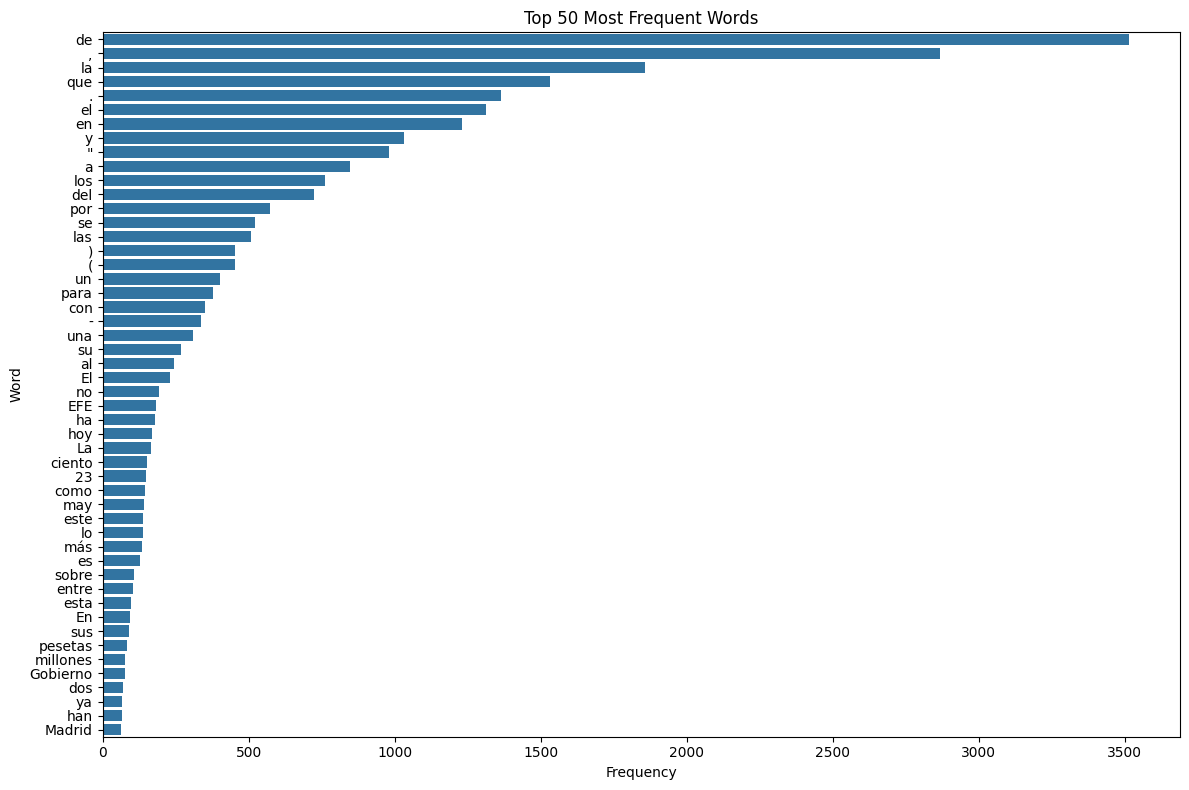

In [8]:
word_freq = Counter(words)
common_words = word_freq.most_common(50)

df_freq = pd.DataFrame(common_words, columns=["Word", "Frequency"])

plt.figure(figsize=(12, 8))
sns.barplot(data=df_freq, y="Word", x="Frequency")
plt.title("Top 50 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()